## Librerias y Funciones

In [215]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
from scipy import stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [216]:
#FUNCION PARA COMPARAR DENSIDAD DE DISTRIBUCIONES ANTES Y DESPUES DE IMPUTAR
def comparison_dist(data_1:pd.Series, data_2:pd.Series, action:str, x_label:str, fig_size:tuple):
    plt.style.use("bmh")    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=fig_size)

    #GRAFICO 1
    sns.kdeplot(x=data_1, ax=ax[0])
    ax[0].set_title('Distribucion original')
    ax[0].set_xlabel(x_label)

    #GRAFICO 2
    sns.kdeplot(data=data_2, ax=ax[1])
    ax[1].set_xlabel(x_label)
    ax[1].set_title(f'Distribucion despues de {action}') #ACTION(IMPUTAR, ELIMINAR)

    #PLOTEO
    plt.tight_layout()
    plt.show()
    plt.style.use("default")

In [217]:
#FUNCION PARA IMPRIMIR INFORMACION DE LA VARIABLE
def get_data_info(var:pd.Series):
    #MEDIDAS DE TENDENCIA CENTRAL DE LA VARIABLE
    print('Medidas de tendencia central')
    print(f'\tMedia: {var.mean().round(2)}')
    print(f'\tMediana: {var.median()}')
    print(f'\tModa: {stats.mode(var)[0]}')

    #MEDIDAS DE DISPERSION
    print('\nMedidas de dispersion')
    print(f'\tCoef asimetria: {var.skew().round(2)}')
    print(f'\tKurtosis: {var.kurtosis().round(2)}')

    #RANGO INTERCUARTILICO
    q1 = var.quantile(0.25)
    q3 = var.quantile(0.75)
    irq = q3-q1

    #VALORES ATIPICOS
    print('\nValores atipicos')

    #MINIMO NO ATIPICO
    min = q1-(irq*1.5)
    print(f'\tMinimo no atipico: {min.round(2)}')

    #MAXIMO NO ATIPICO
    max = q3+(irq*1.5)
    print(f'\tMaximo no atipico: {max}')

    #CONTEO DE ATIPICOS
    outliers = var.loc[(var >max)|(var<min)].shape[0]
    print(f'\nCantidad de valores outliers: {outliers}')

In [218]:
#FUNCION DE TRANSFORMACION PARA VARIABLES CUALITATIVAS ORDINALES
def get_ordinal_var(category:str):
    if re.search(r'^\D+$', category): return '0'
    if re.search(r'.*1$', category): return '1'
    if re.search(r'.*2$', category): return '2'
    if re.search(r'.*3$', category): return '3'
    if re.search(r'.*4$', category): return '4'
    if re.search(r'.*5$', category): return '5'
    if re.search(r'.*6$', category): return '6'
    if re.search(r'.*7$', category): return '7'

In [219]:
#FUNCION PARA GRAFICAR BOXPLOT FINES DETECION DE OUTLIERS
def plot_outliers(var:pd.Series, var_name:str, x_label):
    plt.figure(figsize=(8,3))
    mpl.style.use('bmh')
    sns.boxplot(x=var)
    plt.title(f'Distribucion de la variable {var_name}')
    plt.xlabel(x_label)
    plt.ylabel('Variable')
    plt.tight_layout()
    plt.show()
    mpl.style.use('default')

## Conociendo los datos

### Exploracion del dataset

In [220]:
df = pd.read_csv('https://raw.githubusercontent.com/arielRas/DataSets/main/Hotel_Reservations.csv')
df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,meal_plan,car_parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [221]:
print(f'La cantidad de filas y columnas es: {df.shape}\n\n')
df.info()

La cantidad de filas y columnas es: (36275, 19)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              36275 non-null  object 
 1   num_adults              36275 non-null  int64  
 2   num_children            36275 non-null  int64  
 3   weekend_nights          36275 non-null  int64  
 4   week_nights             36275 non-null  int64  
 5   meal_plan               36275 non-null  object 
 6   car_parking             36275 non-null  int64  
 7   room_type               36275 non-null  object 
 8   lead_time               36275 non-null  int64  
 9   arrival_year            36275 non-null  int64  
 10  arrival_month           36275 non-null  int64  
 11  arrival_date            36275 non-null  int64  
 12  mkt_segment             36275 non-null  object 
 13  repeated_guest          36275 non-null  i

In [222]:
df.describe()

,num_adults,num_children,weekend_nights,week_nights,car_parking,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Data Wrangling

### Variable ***num_adults***

Esta variable describe la cantidad de personas adultas que componen la reserva y que se alojaran en el hotel. Se puede divisar con el metodo ***describe()*** en la celda posterior que el valor minimo de la variable es cero y segun las reglas de negocio de este hotel, en las reservas debe haber al menos un adulto (>= 18 años) por reserva, los menores no pueden reservar por si solos. En el caso de que la reserva solo tenga menores, se interpreta el dato como erroneo.

In [223]:
df.num_adults.describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: num_adults, dtype: float64

In [224]:
#CANTIDAD DE RESERVAS SIN ADULTOS
print(f'La cantidad de reservas sin adultos es: {df.loc[df.num_adults < 1].shape[0]}')

La cantidad de reservas sin adultos es: 139


In [225]:
#Se eliminan las reservas y se verifica
df = df.loc[df.num_adults >= 1]
print(f'La cantidad de reservas sin adultos despues de la modificacion es: {df.loc[df.num_adults < 1].shape[0]}')

#Se imprime informacion del dataframe despues de eliminar registros
print(f'La cantidad de filas y columnas del dataframe despues de la modificacion es: {df.shape}')

La cantidad de reservas sin adultos despues de la modificacion es: 0
La cantidad de filas y columnas del dataframe despues de la modificacion es: (36136, 19)


### Variable ***num_children***

Esta variable describe la cantidad de niños menores que componen la reserva y que se alojaran en el hotel. Se puede divisar con el metodo ***describe()*** en la celda posterior, que la variable muestra el valor **cero** para el tercer cuartil, lo que da la pauta de que en el 75% de los datos en esta variable es cero y su valor maximo es 10, como el valor maximo se aleja bastante del 3er cuartil, veremos si este valor es un outlier.

In [226]:
df.num_children.describe()

count    36136.000000
mean         0.097880
std          0.385097
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: num_children, dtype: float64

In [227]:
for item in range(0,11):
    print(f'La cantidad de reservas con {item} niños es: {df.loc[df.num_children == item].shape[0]}')

La cantidad de reservas con 0 niños es: 33577
La cantidad de reservas con 1 niños es: 1617
La cantidad de reservas con 2 niños es: 925
La cantidad de reservas con 3 niños es: 14
La cantidad de reservas con 4 niños es: 0
La cantidad de reservas con 5 niños es: 0
La cantidad de reservas con 6 niños es: 0
La cantidad de reservas con 7 niños es: 0
La cantidad de reservas con 8 niños es: 0
La cantidad de reservas con 9 niños es: 2
La cantidad de reservas con 10 niños es: 1


Como se puede observar hay valores atipicos que se alejan fuertemente de los datos, debido a la poca significancia cuantitativa de estos datos atipicos, se decide eliminar las observaciones que los contienen.

In [228]:
#SIGNIFICANCIA PORCENTUAL DE LOS DATOS A ELIMINAR
perc = (df.loc[df.num_children >3].shape[0]/df.shape[0])*100
print(f'Los datos a eliminar representan el {perc:.3f}% de los datos')

#SE ELIMINAN DATOS AOUTLIERS
df = df.loc[df.num_children <= 3]

Los datos a eliminar representan el 0.008% de los datos


In [229]:
df.num_children.describe()

count    36133.000000
mean         0.097113
std          0.375780
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: num_children, dtype: float64

### Variables ***weekend_nights*** y ***week_nights***

Estas variables describen la cantidad de dias de fin de semana y dias de semana respectivamente por la cual se reserva la habitacion del hotel. A partir de esto se generará una nueva variable que describa la cantidad de dias totales por la cual se reseva.

In [230]:
#SE CREA DATAFRAME ADICIONAL PARA CREAR NUEVA VARIABLE
booking_nights = df[['weekend_nights','week_nights']].copy()

#SE CREA NUEVA VARIABLE EN BASE A LAS EXISTENTES
booking_nights.loc[:,'total_nights'] = booking_nights.apply(lambda x: x.weekend_nights + x.week_nights, axis=1)

#INFORMACION DE LA NUEVA VARIABLE
booking_nights.total_nights.describe()

count    36133.000000
mean         3.013782
std          1.785856
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_nights, dtype: float64

En la informacion que se muestra de la nueva variable se puede observar que el valor minimo en ella es **cero**, lo cual no seria valido. Por este motivo es que se realizara un analisis para aplicar alguna tecnica de imputacion para los valores atipicos mencionados.

In [231]:
#MEDIDAS DE TENDENCIA CENTRAL DE LA VARIABLE
print(f'Media: {booking_nights.total_nights.mean()}')
print(f'Mediana: {booking_nights.total_nights.median()}')
print(f'Moda: {stats.mode(booking_nights.total_nights)[0]}')

#MEDIDAS DE DISPERSION
print(f'Coef asimetria: {booking_nights.total_nights.skew()}')
print(f'Kurtosis: {booking_nights.total_nights.kurtosis()}')

Media: 3.013782414966928
Mediana: 3.0
Moda: 3
Coef asimetria: 2.235381600158218
Kurtosis: 12.25874810112899


In [232]:
#IMPUTACION DE DATOS ATIPICOS
booking_nights.loc[booking_nights.total_nights == 0, 'total_nights'] = booking_nights.total_nights.median()

#MEDIDAS DE DISPERSION
print(f'Coef asimetria: {booking_nights.total_nights.skew()}')
print(f'Kurtosis: {booking_nights.total_nights.kurtosis()}')

Coef asimetria: 2.2557593832576317
Kurtosis: 12.397887471427797


Como se observa en los coeficientes de dispersion, la imputacion por la **mediana** no ha impactado de manera violenta en la distribucion de la variable, es por ello que se conserva este cambio. Ahora solo queda por unir esta nueva variable al **Dataframe** principal.

In [233]:
#SE INSERTA LA NUEVA VARIABLE AL DATAFRAME PRINCIPAL
position = df.columns.get_loc('week_nights')+1
df.insert(column='total_nights', loc=position, value=booking_nights.total_nights)

#SE LIBERAN RECURSOS
del booking_nights

#INFORMACION
df.total_nights.describe()

count    36133.000000
mean         3.020258
std          1.780346
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: total_nights, dtype: float64

### Variables ***arrival_year***, ***arrival_month*** y ***arrival_date***

Estas variables describen el año, mes y dia de arribo respectivamente. Lo que se hara en esta seccion es crear una variable especifica para describir la fecha y con esta informacion obtener la estacion del año para la cual se realizo la reserva

In [234]:
#PRiMERO SE REALIZARA UN CAMBIO DE NOMBRE A FINES DE EVITAR AMBIGUEDAD
df.rename(columns={'arrival_date':'arrival_day'}, inplace=True)

#SE CREA DATAFRAME COMPLEMETARIO PARA RELIZAR LOS CAMBIOS
dates = df[['arrival_year','arrival_month', 'arrival_day']].copy()
dates.columns = ['y','m','d']

#SE GENERA LA NUEVA VARIABLE
dates.loc[:,'arrival_date'] = dates.apply(lambda x: str(x.y) + '-' + str(x.m) + '-' + str(x.d), axis=1)
dates.head(3)

,y,m,d,arrival_date
0,2017,10,2,2017-10-2
1,2018,11,6,2018-11-6
2,2018,2,28,2018-2-28


Si bien ya se ha obtenido la columna de fecha, esta tiene un tipo de dato ***str***, lo cual no es nuestro objetivo. Por ello se transformaran estos datos a tipo ***Datetime*** lo que va a generar algunos datos nulos que manejaremos posteriormente

In [235]:
#SE CONVIERTE LA VARIABLE ARRIVAL_DATE EN DATETIME
dates.arrival_date = pd.to_datetime(dates.arrival_date, format="%Y-%m-%d",yearfirst=True, errors='coerce')
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36133 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36096 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 564.6 KB


In [236]:
#OBSERVACION DE DATOS NULOS
dates.loc[dates.arrival_date.isna()].head(3)

,y,m,d,arrival_date
2626,2018,2,29,NaT
3677,2018,2,29,NaT
5600,2018,2,29,NaT


Como se puede observar los datos ***NaN*** que se generaron al convertir de ***string*** a ***datetime*** fueron producidos por la fecha ***2018-02-29*** una fecha correspondiente a un año biciesto, pero justamente el año 2018 no lo fue. Para este caso en particular reemplazaremos las fechas conflictivas con la fecha del dia anterior.

In [237]:
#CORRECCION DEL ERROR
condition = (dates.y == 2018) & (dates.m == 2) & (dates.d == 29)
dates.loc[condition, 'd'] = 28

#CONVERSION DE TIPO
dates.loc[dates.arrival_date.isna(), 'arrival_date'] = dates.apply(lambda x: pd.to_datetime(str(x.y) + '-' + str(x.m) + '-' + str(x.d), format="%Y-%m-%d",yearfirst=True), axis=1)

#INFORMACION
dates.arrival_date.info()

<class 'pandas.core.series.Series'>
Index: 36133 entries, 0 to 36274
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
36133 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.6 MB


#### Variable ***arrival season***

Como se mencion anteriormente, se dara lugar a la creacion de esta variable, que refiere la estacion del año para la cual se realiza la reserva.

In [238]:
#CREANDO ESTACIONES DEL AÑO (EUROPA)

#SE CREAN VARIABLES CONDICIONALES
is_summer = ((dates.m == 6) & (dates.d >= 21) | (dates.m == 7) | (dates.d == 8) | (dates.m == 9) & (dates.d <= 22))
is_autumn = ((dates.m == 9) & (dates.d >= 23) | (dates.m == 10) | (dates.d == 11) | (dates.m == 12) & (dates.d <= 20))
is_winter = ((dates.m== 12) & (dates.d >= 21) | (dates.m == 1) | (dates.d == 2) | (dates.m == 3) & (dates.d <= 20))

#SE CREA NUEVA VARIABLE
dates["arrival_season"] = "spring"
dates.loc[is_summer, "arrival_season"] = "summer"
dates.loc[is_autumn, "arrival_season"] = "autumn"
dates.loc[is_winter, "arrival_season"] = "winter"

dates.head(3)

,y,m,d,arrival_date,arrival_season
0,2017,10,2,2017-10-02,winter
1,2018,11,6,2018-11-06,spring
2,2018,2,28,2018-02-28,spring


Con el objetivo logrado parcialmente, ahora es momento de deshacerse de las columnas que no nos sirven en del dataframe principal y agregar las nuevas columnas que se consiguieron

In [239]:
#SE IGUALAN LAS COLUMNAS DEL DATAFRAME PRINCIPAL CON EL COMPLEMENTARIO DE LIBRE DE ERRORES
df.arrival_month = dates.m
df.arrival_day = dates.d

#SE INSERTA LA VARIABLE NUEVA EN EL DATRAFRAME PRINCIPAL
position = df.columns.get_loc('arrival_day')+1
df.insert(column='arrival_season', loc=position, value=dates.arrival_season)

#SE LIBERAN RECURSOS
del dates

df.head(3)

,Booking_ID,num_adults,num_children,weekend_nights,week_nights,total_nights,meal_plan,car_parking,room_type,lead_time,...,arrival_month,arrival_day,arrival_season,mkt_segment,repeated_guest,num_prev_cancellations,num_prev_not_canceled,avg_price_room,num_sp_requests,booking_status
0,INN00001,2,0,1,2,3,Meal Plan 1,0,Room_Type 1,224,...,10,2,winter,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,5,Not Selected,0,Room_Type 1,5,...,11,6,spring,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,3,Meal Plan 1,0,Room_Type 1,1,...,2,28,spring,Online,0,0,0,60.00,0,Canceled


### Variable ***booking_status***

En esta seccion se modificará el nombre de la leyenda para los valores unicos de la variable de interes a fines descriptivos.

In [240]:
df.booking_status = df.booking_status.str.replace('Not_Canceled', 'No cancelada')
df.booking_status = df.booking_status.str.replace('Canceled', 'Cancelada')

### Variables cualitativas

En esta seccion se le da tratamiento a quellas variables que no son numericas. Para ello se utilizara la herramienta ***LabelEncoder*** destinado a las variables nominales, mientras que para las ordinales se lo hara respetando el orden inherente a su naturaleza. Aqui

In [241]:
#LISTA CON NOMBRE DE VARIABLES CUALITATIVAS
qualitative_var = [column for column in df.columns if df[column].dtype == 'object']
qualitative_var.remove('Booking_ID')
print(qualitative_var)

['meal_plan', 'room_type', 'arrival_season', 'mkt_segment', 'booking_status']


Para explorar el contenido de cada variable cualitativa se imprime us valores unicos para cada una de ellas

In [242]:
#VALORES UNICOS PARA CADA VARIABLE
for var in qualitative_var:
    print(f'{var}:')
    for item in df[var].unique():
        print(f'\t{item}')

meal_plan:
	Meal Plan 1
	Not Selected
	Meal Plan 2
	Meal Plan 3
room_type:
	Room_Type 1
	Room_Type 4
	Room_Type 6
	Room_Type 5
	Room_Type 2
	Room_Type 7
	Room_Type 3
arrival_season:
	winter
	spring
	autumn
	summer
mkt_segment:
	Offline
	Online
	Corporate
	Aviation
	Complementary
booking_status:
	No cancelada
	Cancelada


Conociendo mejor el contenido de las variables cualitativas, se decide crear las siguientes variables numericas:
- meal_plan_id
- room_type_id
- booking_status_id
- mkt_segment_id
- arrival_season_id

Cada una corresponde a una variable cualitativa pero conteniendo un codigo numerico correspondiente a cada valor unico de la variable. Para aquellas que son de naturaleza ordinal se asignan los valores cuantitativos de manera manual a fin de conservar el orden natural de la variable. Mientras que para las nominales se utilza ***LabelEncoder***.

In [243]:
#DATAFRAME COMPLEMENTARIO
df_qualitative = df[qualitative_var].copy()

#TRANSFORMACION VARIABLES ORDINALES
df_qualitative.loc[:,'meal_plan_cod'] = df_qualitative.meal_plan.apply(get_ordinal_var)
df_qualitative.meal_plan_cod = df_qualitative.meal_plan_cod.astype(int)

df_qualitative.loc[:,'room_type_cod'] = df_qualitative.room_type.apply(get_ordinal_var)
df_qualitative.room_type_cod = df_qualitative.room_type_cod.astype(int)

#TRANSFORMACION VARIABLES NOMINALES
encoder = LabelEncoder()
df_qualitative['mkt_segment_cod'] = encoder.fit_transform(df_qualitative.mkt_segment.values)
df_qualitative['arrival_season_cod'] = encoder.fit_transform(df_qualitative.arrival_season.values)

df_qualitative['booking_status_cod'] = df_qualitative['booking_status']
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].str.replace('No cancelada','0')
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].str.replace('Cancelada','1')
df_qualitative['booking_status_cod'] = df_qualitative['booking_status_cod'].astype(int)

#SE ELIMINAN LAS VARIABLES NO NECESARIAS
df_qualitative.drop(columns=qualitative_var, inplace=True)


df_qualitative.head()

,meal_plan_cod,room_type_cod,mkt_segment_cod,arrival_season_cod,booking_status_cod
0,1,1,3,3,0
1,0,1,4,1,0
2,1,1,4,1,1
3,1,1,4,1,1
4,0,1,4,0,1


Luego de crear las variables numericas se las insertan en el datafreme original

In [244]:
#CONCATENACION DE DATAFRAMES
df = pd.concat([df, df_qualitative], axis=1)

#SE LIBERAN RECURSOS
del df_qualitative

#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36133 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Booking_ID              36133 non-null  object 
 1   num_adults              36133 non-null  int64  
 2   num_children            36133 non-null  int64  
 3   weekend_nights          36133 non-null  int64  
 4   week_nights             36133 non-null  int64  
 5   total_nights            36133 non-null  int64  
 6   meal_plan               36133 non-null  object 
 7   car_parking             36133 non-null  int64  
 8   room_type               36133 non-null  object 
 9   lead_time               36133 non-null  int64  
 10  arrival_year            36133 non-null  int64  
 11  arrival_month           36133 non-null  int64  
 12  arrival_day             36133 non-null  int64  
 13  arrival_season          36133 non-null  object 
 14  mkt_segment             36133 non-null  obj

### Variable ***avg_price_room***

Esta variable describe el precio promedio en euros de la habitacion rentada. El metodo ***describe()*** en la celda posterior, muestra el valor ***cero*** como minimo de la variable, lo cual no tiene sentido para este caso. Tambien se observa un valor maximo que se despega bastante del 3er cuartil lo cual puede que sea un indicio de la presencia de valores atipicos. En esta seccion se evaluaran los casos mencionados y la forma en que estos seran tratados.

In [245]:
df.avg_price_room.describe()

count    36133.000000
mean       103.509164
std         35.062636
min          0.000000
25%         80.390000
50%         99.480000
75%        120.120000
max        540.000000
Name: avg_price_room, dtype: float64

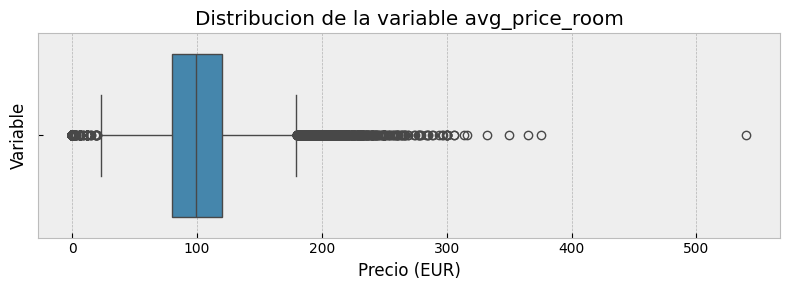

In [246]:
#BOXPLOT PARA IDENTIFICAR OUTLIERS
plot_outliers(df.avg_price_room, 'avg_price_room', 'Precio (EUR)')

In [247]:
#SE IMPORTA MODELO DETECCION DE IUTLIERS
from sklearn.covariance import EllipticEnvelope

#SE INSTANCIA EL MODELO Y SE REALIZA PREDICCION
cov_determinant = EllipticEnvelope(contamination=0.06)
predict = cov_determinant.fit_predict(df.avg_price_room.values.reshape(-1,1))

#DATAFRAME COMPLEMENTARIO PARA TESTEAR MODELO
price = df.avg_price_room.copy().reset_index()

#SE AÑADE LA COLUMNA DE PREDICCIONES AL DATAFRAME PRICE
price['is_outlier'] = pd.Series(predict)

#CONTEO DE OUTLIERS
print(f'Cantidad de outliers encontrados: {price.loc[price.is_outlier == -1].shape[0]}')

Cantidad de outliers encontrados: 2132


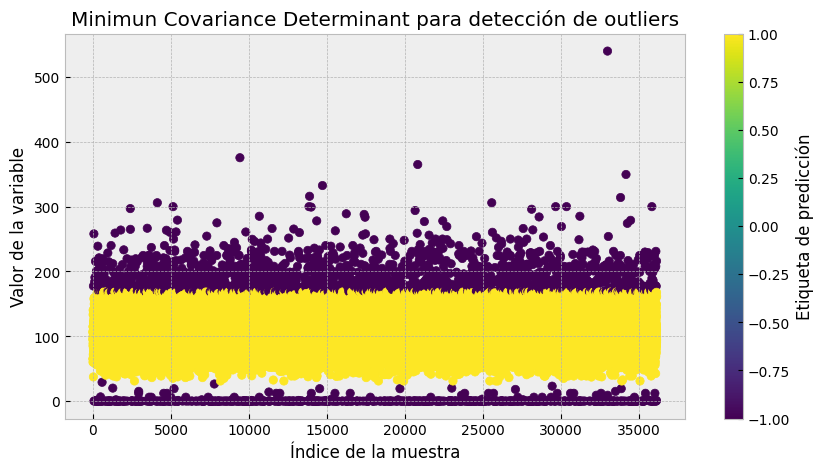

In [248]:
#REPRESENTACION GRAFICA DE OUTLIERS
mpl.style.use('bmh')
plt.figure(figsize=(10,5))
plt.scatter(price.index, price.avg_price_room, c=price.is_outlier, cmap='viridis')
plt.xlabel('Índice de la muestra')
plt.ylabel('Valor de la variable')
plt.title('Minimun Covariance Determinant para detección de outliers')
plt.colorbar(label='Etiqueta de predicción')
plt.show()
mpl.style.use('bmh')

#### Entrenamiento de modelo ***Random Forest Regressor*** para imputar outliers

In [249]:
#VISTA DE LOS COEFICIENTES DE CORRELACION PARA LA VARIABLE AVG_PRICE_ROOM
correlation = df.corr(numeric_only=True)
correlation['avg_price_room']

num_adults                0.296461
num_children              0.377067
weekend_nights           -0.005066
week_nights               0.023566
total_nights              0.005459
car_parking               0.061508
lead_time                -0.062653
arrival_year              0.179118
arrival_month             0.053730
arrival_day               0.018270
repeated_guest           -0.175783
num_prev_cancellations   -0.063669
num_prev_not_canceled    -0.114210
avg_price_room            1.000000
num_sp_requests           0.185877
meal_plan_cod             0.135584
room_type_cod             0.472601
mkt_segment_cod           0.377406
arrival_season_cod       -0.046907
booking_status_cod        0.142682
Name: avg_price_room, dtype: float64

In [250]:
#IMPORTACION DE LIBRERIAS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [251]:
#SE RESETEA LOS INDICES DEL DATAFRAME PRINCIPAL PARA EVITAR ERRORES
df = df.reset_index()

#SE AGREGA LA VARIABLE DE OUTLIER AL DATAFRAME PRINCIPAL
df['is_outlier'] = price.is_outlier

#FEATURE ENGINEERING
x = df.loc[df.is_outlier == 1, ['room_type_cod','mkt_segment_cod','num_children','num_adults',
                                'repeated_guest','booking_status_cod','meal_plan_cod','num_sp_requests',
                                'arrival_year','car_parking']]

y = df.loc[df.is_outlier == 1, 'avg_price_room']

#SELECCION DE DATOS PARA ENTRENAMIENTO Y TEST
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [252]:
#INSTANCIA, ENTRENAMIENTO Y PREDICCION DEL MODELO RANDOM FOREST
model = RandomForestRegressor(max_depth=12, max_features=0.5, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [253]:
#METRICAS DE REGRESION
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 381.28654789033385
Root Mean Squared Error (RMSE): 19.526560062907492
R^2 Score: 0.43747055485666986


#### Imputacion y analisis

In [254]:
#SE UTILIZA EL MODELO PARA PREDECIR LOS VALORES DE AQUELLAS INSTANCIAS QUE PRESENTAN OUTLIERS
x = df.loc[df.is_outlier == -1,['room_type_cod','mkt_segment_cod','num_children','num_adults',
                                'repeated_guest','booking_status_cod','meal_plan_cod','num_sp_requests',
                                'arrival_year','car_parking']]
y_pred = model.predict(x)

#IMPUTACION DE VALORES OUTLIERS
df.loc[df.is_outlier == -1, 'avg_price_room'] = y_pred

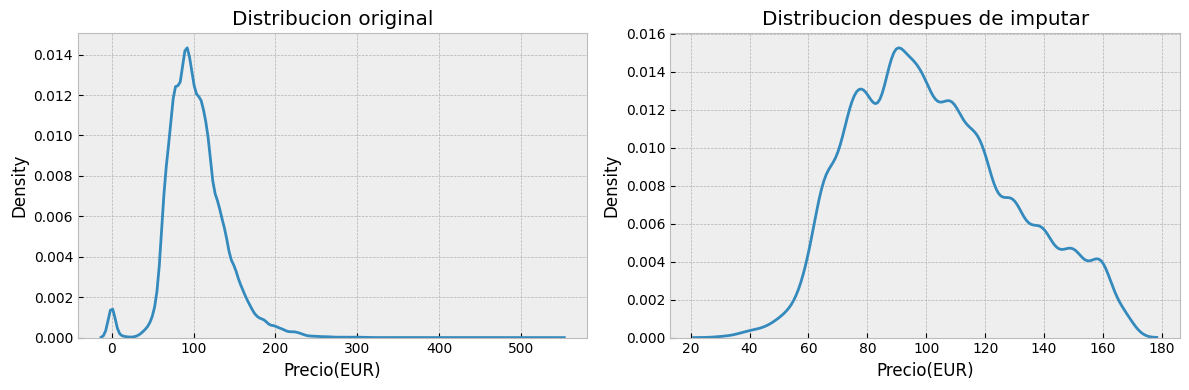

In [255]:
#GRAFICO DE COMPARACION DE DISTRIBUCIONES
comparison_dist(price.avg_price_room, df.avg_price_room, 'imputar', 'Precio(EUR)', (12,4))

In [256]:
#INFO VARIABLE ANTES DE IMPUTAR
print('-----Antes de imputar-----')
get_data_info(price.avg_price_room)

#INFO VARIABLE DESPUES DE IMPUTAR
print('\n-----Despues de imputar-----')
get_data_info(df.avg_price_room)

-----Antes de imputar-----
Medidas de tendencia central
	Media: 103.51
	Mediana: 99.48
	Moda: 65.0

Medidas de dispersion
	Coef asimetria: 0.68
	Kurtosis: 3.16

Valores atipicos
	Minimo no atipico: 20.79
	Maximo no atipico: 179.715

Cantidad de valores outliers: 1676

-----Despues de imputar-----
Medidas de tendencia central
	Media: 102.63
	Mediana: 99.85
	Moda: 65.0

Medidas de dispersion
	Coef asimetria: 0.37
	Kurtosis: -0.53

Valores atipicos
	Minimo no atipico: 22.5
	Maximo no atipico: 178.5

Cantidad de valores outliers: 0


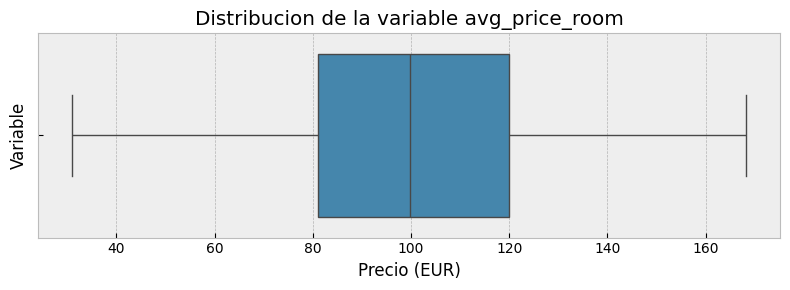

In [257]:
#BOXPLOT PARA IDENTIFICAR OUTLIERS
plot_outliers(df.avg_price_room, 'avg_price_room', 'Precio (EUR)')

In [258]:
#SE REEMPLAZA LA VARIABLE DEL DATAFRAME PRINCIPAL POR LA SERIE CON VALORES IMPUTADOS
df.drop(columns=['is_outlier'], inplace=True)

#SE LIBERAN RECURSOS
del price
del cov_determinant
del model
del x, y
del X_train, X_test, y_train, y_test
del y_pred


#INFO
df.avg_price_room.describe()

count    36133.000000
mean       102.632481
std         27.092586
min         31.000000
25%         81.000000
50%         99.850000
75%        120.000000
max        168.300000
Name: avg_price_room, dtype: float64

### GUARDADO CHECKPOINT

In [259]:
#df.to_csv('Hotel_Reservations_clean.csv', index=False)